##Exercise 2a
###Single layer Perceptron

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

print ("Random number with seed 30")
random.seed(6)
data = pd.read_csv('iris.csv')


Random number with seed 30


In [87]:
# Total Instances on each iris plant class
data["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [88]:
# Statistics for each feature
# No missing values because the total number of instances for each feature is 150(i.e. Count)
data.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


With the help of seaborn we can create bivariete relationships between features to see any patterns that may occur.<br>As we can see for most of the features the classes overlap so the dataset is not linearly seperable. 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


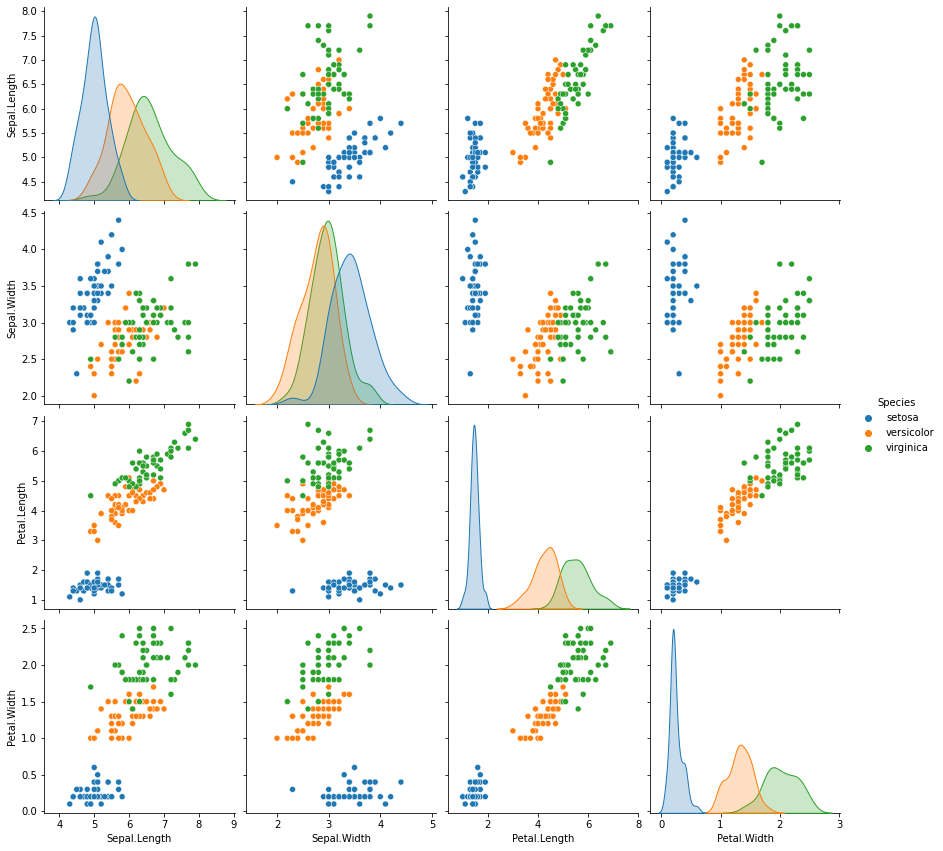

In [89]:

#drop the column with the ids
data=data.drop("Unnamed: 0", axis=1)
# Bivariate Pairwise relationships between columns with seaborn library
sns.pairplot(data, hue="Species", size=3, diag_kind="kde")

In [90]:
# Replace Iris-setosa with 0, Iris-versicolor 1 and Iris-virginica 2 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["Species"] = labelencoder.fit_transform(data["Species"])
species = pd.DataFrame({'Species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']})
print(species)

           Species
0      Iris-setosa
1  Iris-versicolor
2   Iris-virginica


In [91]:
# Onehotencoder works with a matrix of integers whereas getdummies works with a dataframe
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

data = create_dummies(data,"Species")
data=data.drop("Species", axis=1)
print(data)

     Sepal.Length  Sepal.Width  Petal.Length  ...  Species_0  Species_1  Species_2
0             5.1          3.5           1.4  ...          1          0          0
1             4.9          3.0           1.4  ...          1          0          0
2             4.7          3.2           1.3  ...          1          0          0
3             4.6          3.1           1.5  ...          1          0          0
4             5.0          3.6           1.4  ...          1          0          0
..            ...          ...           ...  ...        ...        ...        ...
145           6.7          3.0           5.2  ...          0          0          1
146           6.3          2.5           5.0  ...          0          0          1
147           6.5          3.0           5.2  ...          0          0          1
148           6.2          3.4           5.4  ...          0          0          1
149           5.9          3.0           5.1  ...          0          0          1

[15

In [92]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X = data[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = data[['Species_0', 'Species_1', 'Species_2']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
x_train.insert(0, "bias", np.ones(112), True)
x_test.insert(0, "bias", np.ones(38), True)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_val.shape)


(22, 5)


In [99]:


class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=1000, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        #CAREFULL the weights array is transposed
        self.weights = np.array(np.random.rand(3, 5))
        self.prediction=np.ones((112, 3))
        self.prev= np.array(np.random.rand(3, 5))
        
    def predict(self, inputs):
        weights1=(self.weights)
        
        summation = np.dot(weights1, inputs)
        
        activation=np.zeros(len(summation))
        for i in range(len(summation)):
          if summation[i] > 0:
            activation[i] = 1
          else:
            activation[i] = 0  
                 
        return activation

    def train(self, training_inputs, labels):
        lim=0
        for iterator in range(self.threshold):
            i=0
            loc=self.weights
            self.prev=loc
            for inputs, label in zip(training_inputs, labels):
                #every line has 5 values(4 inputs +bias)
                
                
                self.prediction[i] = self.predict(inputs)
                
                update=(self.learning_rate * (label - self.prediction[i]))
                update=update.reshape(-1, 1)
                
                inputs=inputs.reshape(1, -1)
                
                
                self.weights += np.dot(update,inputs)
                
                i=i+1
            
            
           # if(self.prev.all()==self.weights.all()):
            #  print(iterator)
           #   break
    def test(self,test_inputs,test_labels):
        error=0
        for test_input, tlabel in zip(test_inputs, test_labels):
          prediction = self.predict(test_input)

          tlabel=tlabel.reshape(1,-1)
          prediction=prediction.reshape(1,-1)
          if (prediction-tlabel).any()!=0: #if label and prediction is not the same increase error by 1
            error+=1
        print(error)  
        print(error/test_inputs.shape[0])
            

In [116]:

import matplotlib.pyplot as plt

#We instantiate a new perceptron, only passing in the argument 2 therefore allowing for the default threshold=100 and learning_rate=0.01
perceptron = Perceptron(4)

print(type(x_train))
x_train=np.array(x_train, dtype=np.float32)
y_train=np.array(y_train, dtype=np.float32)
x_test=np.array(x_test, dtype=np.float32)
y_test=np.array(y_test, dtype=np.float32)
x_val=np.array(x_val, dtype=np.float32)
y_val=np.array(y_val, dtype=np.float32)
perceptron.train(x_train, y_train)

perceptron.test(x_train, y_train)
perceptron.test(x_val,y_val)
perceptron.test(x_test,y_test)




<class 'numpy.ndarray'>
28
0.25
8
0.36363636363636365
5
0.3125


##Results
As we can see the training error is 0.25 ( 28 out of 112 samples)<br>
 the validation error is 0.36 ( 8 out of 22 samples)<br>
 and the test error is 0.315 ( 5 out of  16 samples)<br>
 As we can see the error is significant which is expected since we use a linear classifier but not all of the classes are linearly seperable.